# Example-01: Square matrix representation

In [1]:
(* In this example, the workflow required to construct a square matrix representation is presented *)
(* Given a Taylor series approximation of a one-turn transformation *)
(* The first step is to perform linear normalization, with the resulting linear part corresponding to a rotation in the linear normalized Floquet frame *)
(* Next, express the transformation using linear complex eigencoordinates *)
(* Finaly, compute truncated expressions for transformed eigenmonomials in terms of the initial ones *)
(* Thus, the square matrix that approximates how eigenmonomial are trasformed can be constructed *)
(* This matrix approximates an infinite eigenmonomial matrix, that represents initial nonlinear system as a linear one with infinite dimensionality *) 

In [8]:
(* Load package functions *)

<< SquareMatrixMethod`

In [10]:
(* Define transformation *)

ClearAll[initial$map];
initial$map[{q_, p_}] := {p, -q + a*p + p^2} ;

In [13]:
(* Define transformations between original coordinates (q, p) and Floquet frame coordinates (Q, P) *)

QP$qp = {
    Q -> (+q - p*(Cos[w] + Sin[w]))/(Sqrt[2]*Sqrt[Sin[w]]), 
    P -> (-q + p*(Cos[w] + Sin[w]))/(Sqrt[2]*Sqrt[Sin[w]])
} ;

qp$QP = {
    q -> ((Q + P)*Cos[w] + (Q - P)*Sin[w])/(Sqrt[2]*Sqrt[Sin[w]]), 
    p -> (Q + P)/(Sqrt[2]*Sqrt[Sin[w]])
} ;

In [16]:
(* Define transformation in Floquet coordinates *)

ClearAll[floquet$map] ;
floquet$map[{Q_, P_}] := Evaluate[Map[Total, Map[FullSimplify, MonomialList[Inverse[D[{q, p} /. qp$QP, {{Q, P}}]] . (initial$map[{q, p}] /. qp$QP) /. a -> 2 Cos[w], {Q, P}]]]] ;

In [19]:
(* Check linear part *)

D[Collect[Normal[Series[floquet$map[t {q, p}], {t, 0, 1}]], {q, p}, Simplify] /. t -> 1, {{q, p}}]

{{Cos[w], Sin[w]}, {-Sin[w], Cos[w]}}

In [21]:
(* Check symplectic condition for the full transformed map *)

S = {{0, 1}, {-1, 0}} ;
M = D[floquet$map[{q, p}], {{q, p}}] ;
S === Simplify[Transpose[M] . S . M]

True

In [25]:
(* Set global parameter for square matrix computation *)

dimension = 2                 ; (* -- phase space dimension *)
degree    = 4                 ; (* -- computation degree *)
epsilon   = 10.0^-15          ; (* -- chop epsilon *)
accuracy  = $MachinePrecision ; (* -- computation accuracy (not used internally) *)

sm$set$global[dimension, degree, epsilon, accuracy] ;

RowBox[{"4"}]
1   0

0   1

2   0

1   1

0   2

3   0

2   1

1   2

0   3

4   0

3   1

2   2

1   3

0   4
RowBox[{"{", RowBox[{"2", ",", "3", ",", "4", ",", "5"}], "}"}]
RowBox[{"{", RowBox[{RowBox[{"{", RowBox[{"1", ",", "2"}], "}"}], ",", 

 
>         RowBox[{"{", RowBox[{"3", ",", "5"}], "}"}], ",", 

 
>         RowBox[{"{", RowBox[{"6", ",", "9"}], "}"}], ",", 

 
>         RowBox[{"{", RowBox[{"10", ",", "14"}], "}"}]}], "}"}]

RowBox[{"14"}]
RowBox[{"{", RowBox[{"x", ",", "y", ",", SuperscriptBox["x", "2"], ",", 

 
>         RowBox[{"x", " ", "y"}], ",", SuperscriptBox["y", "2"], ",", 

 
>         SuperscriptBox["x", "3"], ",", RowBox[{SuperscriptBox["x", "2"], " ", "y"}], 

 
>         ",", RowBox[{"x", " ", SuperscriptBox["y", "2"]}], ",", 

 
>         SuperscriptBox["y", "3"], ",", SuperscriptBox["x", "4"], ",", 

 
>         RowBox[{SuperscriptBox["x", "3"], " ", "y"}], ",", 

 
>         RowBox[{SuperscriptBox["x", "2"], " ", SuperscriptBox["y", "2"]}], ",", 

 
>         RowBox[{"x", " ", SuperscriptBox["y", "3"]}], ",", SuperscriptBox["y", "4"]}],\
 
>    
    "}"}]

RowBox[{"{", RowBox[{RowBox[{"1.`*^-15", " ", "x"}], ",", "0"}], "}"}]
RowBox[{"1.`15.954589770191003"}]
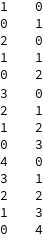

In [31]:
(* The above sets the following global variables and functions *)

sm$degree                        // StandardForm                 (* -- computation degree *)
sm$exponents                     // Map[TableForm] // TableForm  (* -- list of exponents grouped by total monomial degree *)
sm$counts                        // StandardForm                 (* -- number of exponents in each degree *)
sm$intervals                     // StandardForm                 (* -- degree bounding indices *)
sm$size                          // StandardForm                 (* -- total number of monomials *)
sm$monomials[x, y]               // StandardForm                 (* -- (function) returns monomials corresponding to each exponent *)
sm$chop @ (epsilon*{1.0, 0.5}*x) // StandardForm                 (* -- (function) chop *)
sm$accuracy[1]                   // StandardForm                 (* -- (function) accuracy *)

In [40]:
(* Given a mapping in Floquet frame, it can be converted to complex eigencoordinates using the sm$make$map function *)

(* z1 = z  = q - i p *)
(* z2 = z* = q + i p *)

(* Set linear normalization matrix (identity, since the above is already normalized) *)

normalization = {{1, 0}, {0, 1}} ;

(* Convert *)

{{forward, inverse}, mapping} = sm$make$map[normalization, floquet$map] ;

(* forward -- (function) transformation rules from eigencoordinates *)
(* inverse -- (function) transformation rules to eigencoordinated *)
(* mapping -- (function) transformation in eigencoordinates *)

RowBox[{"{", RowBox[{RowBox[{"q", "", 

 
>           RowBox[{FractionBox["p", "2"], "+", FractionBox["q", "2"]}]}], ",", 

 
>         RowBox[{"p", "", RowBox[{RowBox[{"-", 

 
>               FractionBox[RowBox[{"", " ", "p"}], "2"]}], "+", 

 
>             FractionBox[RowBox[{"", " ", "q"}], "2"]}]}]}], "}"}]

RowBox[{"{", RowBox[{RowBox[{"q", "", 

 
>           RowBox[{RowBox[{RowBox[{"-", ""}], " ", "p"}], "+", "q"}]}], ",", 

 
>         RowBox[{"p", "", RowBox[{RowBox[{"", " ", "p"}], "+", "q"}]}]}], "}"}]
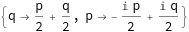

In [50]:
(* Both forward and inverse transformation rules are returned as funtions *)
(* Note, rules have identical symbols on each side *)

forward[q, p] // StandardForm
inverse[q, p] // StandardForm

In [54]:
(* Explore connection between representations *)

(* Given the initial coordinates in Floquet frame, compute the final coordinates *)

StandardForm@Block[
    {x = {0.50, 0.25}, w = 2*Pi*0.12345},
    floquet$map[x]
] 

StandardForm@Block[
    {x = {0.50, 0.25}, w = 2*Pi*0.12345, za, zb},
    (* Transform to eigencoordinates *)
    x = {za, zb} /. inverse[za, zb] /. Thread[{za, zb} -> x] ;
    (* Transform to final eigencoordinates *)
    x = mapping @@ x ;
    (* Transform to final coordinates in Floquet frame *)
    {za, zb} /. forward[za, zb] /. Thread[{za, zb} -> x] // sm$chop
]

(* Given the initial coordinates in complex eigencoordinates, compute the final coordinates *)

StandardForm@Block[
    {x = {0.50 - I*0.25, 0.5 + I*0.25}, w = 2*Pi*0.12345},
    mapping @@ x   
]

StandardForm@Block[
    {x = {0.50 - I*0.25, 0.5 + I*0.25}, w = 2*Pi*0.12345, za, zb},    
    (* Transform to Floquet frame *)
    x = {za, zb} /. forward[za, zb] /. Thread[{za, zb} -> x] ;
    (* Transform to final coordinates *)
    x = floquet$map @ x ;
    (* Transform to final complex eigencoordinates *)
    {za, zb} /. inverse[za, zb] /. Thread[{za, zb} -> x] // sm$chop
]

RowBox[{"{", RowBox[{"0.5273515834528857`", ",", "0.30840721940144966`"}], "}"}]

RowBox[{"{", RowBox[{"0.5273515834528857`", ",", "0.3084072194014498`"}], "}"}]

RowBox[{"{", RowBox[{RowBox[{RowBox[{"0.5273515834528856`", " "}], "-", 

 
>           RowBox[{"0.3084072194014498`", " ", ""}]}], ",", 

 
>         RowBox[{RowBox[{"0.5273515834528858`", " "}], "+", 

 
>           RowBox[{"0.3084072194014497`", " ", ""}]}]}], "}"}]

RowBox[{"{", RowBox[{RowBox[{RowBox[{"0.5273515834528857`", " "}], "-", 

 
>           RowBox[{"0.30840721940144966`", " ", ""}]}], ",", 

 
>         RowBox[{RowBox[{"0.5273515834528857`", " "}], "+", 

 
>           RowBox[{"0.30840721940144966`", " ", ""}]}]}], "}"}]

In [61]:
(* initial$map be directly transformed using appropriate normalization matrix *)
(* Note, linear transformations will contain the effect of normalization matrix *)

normalization = D[{q, p} /. qp$QP, {{Q, P}}] ;
{{initial$forward, initial$inverse}, initial$mapping} = sm$make$map[normalization, initial$map] ;

mapping[za, zb] - initial$mapping[za, zb] /. a -> 2 Cos[w] // Simplify // StandardForm

RowBox[{"{", RowBox[{"0", ",", "0"}], "}"}]

1/4  I w             3/4  I w
            1    (-1)    E            (-1)    E
{2, 0} -> -(-) ----------------- + -------------------
            2    -I w    I w 3/2       -I w    I w 3/2
               (E     - E   )      2 (E     - E   )
 
                     1/4  I w            3/4  I w
                 (-1)    E           (-1)    E
     {1, 1} -> ----------------- + -----------------
                 -I w    I w 3/2     -I w    I w 3/2
>              (E     - E   )      (E     - E   )
 



                I w
>    {1, 0} -> E
 
                      1/4  I w              3/4  I w
                  (-1)    E             (-1)    E
     {0, 2} -> ------------------- - -------------------
                   -I w    I w 3/2       -I w    I w 3/2
>              2 (E     - E   )      2 (E     - E   )

                      1/4                        3/4
                  (-1)                       (-1)
{2, 0} -> ------------------------ + ------------------------
             I w   -I w    I w 3/2      I w   -I w    I w 3/2
          2 E    (E     - E   )      2 E    (E     - E   )
 
                          1/4                      3/4
                      (-1)                     (-1)
     {1, 1} -> ---------------------- - ----------------------
                I w   -I w    I w 3/2    I w   -I w    I w 3/2
>              E    (E     - E   )      E    (E     - E   )
 
                               1/4                       3/4
                 1         (-1)                      (-1)
     {0, 2} -> -(-) ---------------------- - ------------------------
                 2   I w   -I w    I w 3/2      I w   -I w    I w 3/2
>                   E    (E     - E   )      2 E    (E     - E   )
 



                -I w
>    {0, 1} -> E
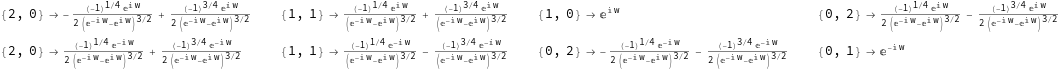

In [66]:
(* For pure analytical computation, it might the better to replace monomial coefficients with symbols *)

CoefficientRules[mapping[za, zb], {za, zb}] // TableForm

1    I      1/4  I w
               (-(-) + -) (-1)    E                  1/4  I w
                  2    2                 (1 + I) (-1)    E
               -----------------------   --------------------
 I w                -I w    I w 3/2         -I w    I w 3/2
E      0          (E     - E   )          (E     - E   )
 
      1   I      1/4  I w
     (- - -) (-1)    E
      2   2
     --------------------
        -I w    I w 3/2
>     (E     - E   )          0   0   0   0   0   0   0   0   0

                   1   I      1/4
                  (- + -) (-1)                          1/4
                   2   2                    (1 - I) (-1)
               ----------------------    ----------------------
        -I w    I w   -I w    I w 3/2     I w   -I w    I w 3/2
0      E       E    (E     - E   )       E    (E     - E   )
 
          1    I      1/4
       (-(-) - -) (-1)
          2    2
     ----------------------
      I w   -I w    I w 3/2
>    E    (E     - E   )      0   0   0   0   0   0   0   0   0
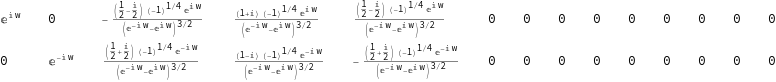

In [68]:
(* To construct the square matrix representation, truncated products for all monomials should be computed *)
(* Optimized product computation can be used, it this case transformations are represented as jets internaly *)
(* Note, ordering corresponds to sm$exponents *)

jet = sm$make$jet[mapping] ;
jet // TableForm

In [73]:
(* Functional form can be computed from jet form *)

sm$make$observable[jet][za, zb] === mapping[za, zb] // StandardForm

RowBox[{"True"}]

In [75]:
(* For high phase space dimension internal jet representation is more efficient *)
(* To use jet form, multiplicaton should be defined after setting global paramters *)

sm$make$mult[] ;

(* This defines sm$mult and sm$mult$compiled function for truncated multiplication of jets *)
(* Note, sm$mult$compiled should be used with pure numerical jets *)
(* Compilation target is "WVM" and should be manualy changed to "C" in the package code *)
(* Compilation to "C" might take some time, the resulting compiled funtion can be saved for later use with LibraryGenerate *)

In [82]:
(* Compute product *)
(* Note, there is no need to trancate in this case *)

(Normal[Times @@ mapping[t*za, t*zb] + O[t]^(sm$degree + 1)] /. t -> 1) - sm$make$observable[sm$mult[sm$make$jet[mapping]]][za, zb] // Simplify // StandardForm

RowBox[{"0"}]

In [85]:
(* Since jet representation of the map might be sparse, futher optimization of multiplication can be performed *)

sm$optimize$mult[mapping] ;

(* This defines sm$mult$optimized function (sm$make$mult[] is assumed to be executed) *)

SQUARE MATRIX ("JET")
Dimension                          :  2
Computation degree                 :  4
Monomial variables                 :  14
Matrix dimensions                  :  14 x 14 = 196
Make jets...
Finished in 0.000503 sec.
Set initial matrix...
Set partitions...
Enter main loop...
Now computing order 2...
Finished in 0.003635 sec.
Now computing order 3...
Finished in 0.005075 sec.
Now computing order 4...
Finished in 0.000168 sec.
Exit main loop...
Finished in 0.023425 sec.
Return square matrix...


I w
E                                    0
 
                                                                                . 
                  I w                                 I w                         za
                 E                         I Sqrt[2] E
     -(-------------------------)         -----------------
                 -I w    I w 3/2            -I w    I w 3/2                       zb
>      Sqrt[2] (E     - E   )             (E     - E   )
                                                                                    2
                                                                                  za
                I w
               E
     -------------------------                                                    za zb
               -I w    I w 3/2
>    Sqrt[2] (E     - E   )               0                                         2
                                                                                  zb

                                                                                    3
                                                                                  za

                                                                                    2
>    0                                    0                                       za  zb
 
                                                                                       2
                                                                                  za zb

                                                                                    3
                                                                                  zb
>    0                                    0
                                                                                    4
                                                                                  za

                                                                                    3
                                                                                  za  zb

>    0                                    0                                         2   2
                                                                                  za  zb

                                                                                       3
                                                                                  za zb

                                                                                    4
>    0                                    0                                       zb





                                      -I w
0                                    E
 


                   I                             Sqrt[2]
     ------------------------------       ----------------------
              I w   -I w    I w 3/2        I w   -I w    I w 3/2
>    Sqrt[2] E    (E     - E   )          E    (E     - E   )
 


                   -I
     ------------------------------
              I w   -I w    I w 3/2
>    Sqrt[2] E    (E     - E   )          0
 





>    0                                    0
 





>    0                                    0
 





>    0                                    0
 





>    0                                    0






0                                    0
 




      (2 I) w
>    E                                    0
 

                                                     (2 I) w
                                            Sqrt[2] E
                                          -(-----------------)
                                              -I w    I w 3/2
>    0                                      (E     - E   )
 

                    (2 I) w                        (2 I) w
     (2 I) Sqrt[2] E                      Sqrt[2] E
     ----------------------               -----------------
         -I w    I w 3/2                    -I w    I w 3/2
>      (E     - E   )                     (E     - E   )
 

                     
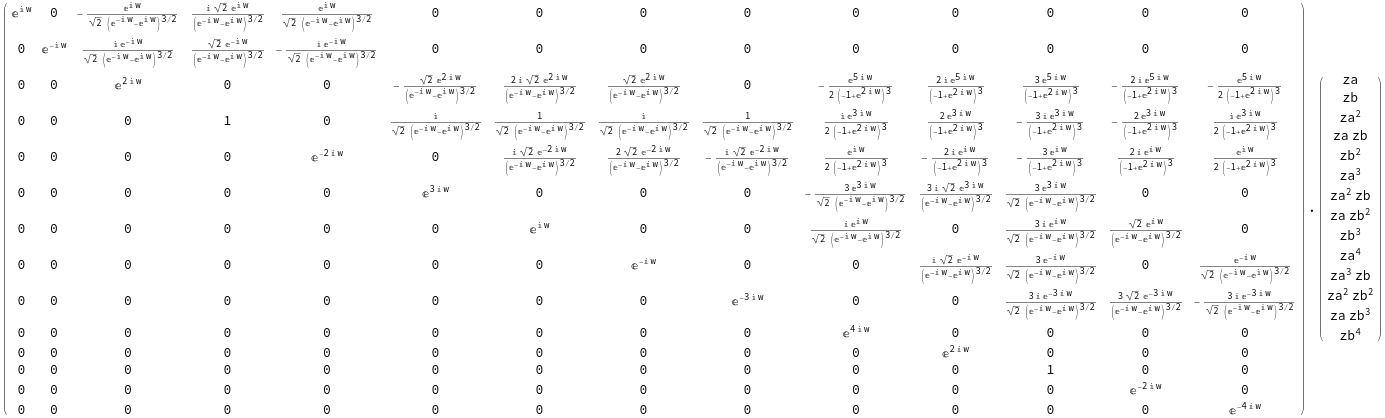

In [88]:
(* sm$make$matrix can be used to construct square matrix representation *)

(* The first agrument should be one of the following: *)
(* "DIRECT"      -- direct computation *)
(* "JET"         -- jet multiplicaton (sm$make$mult[] is assumed to be executed) *)
(* "COMPILED"    -- compiled jet multiplication (sm$make$mult[] is assumed to be executed) *)
(* "OPTIMIZED"   -- opimized jet multiplication (sm$make$mult[] and sm$optimize$mult[] assumed to be executed) *)

(* Use "COMPILED" for pure numerical transformations and "JET" or "OPTIMIZED" in other cases *)

matrix = sm$make$matrix["JET", mapping, "Verbose" -> True] ;
(matrix // Simplify // MatrixForm) . (sm$monomials[za, zb] // MatrixForm)

SQUARE MATRIX ("JET")
Dimension                          :  2
Computation degree                 :  32
Monomial variables                 :  560
Matrix dimensions                  :  560 x 560 = 313600
Make jets...
Finished in 0.002762 sec.
Set initial matrix...
Set partitions...
Enter main loop...
Now computing order 2...
Finished in 0.025788 sec.
Now computing order 3...
Finished in 0.048407 sec.
Now computing order 4...
Finished in 0.068301 sec.
Now computing order 5...
Finished in 0.11741 sec.
Now computing order 6...
Finished in 0.146959 sec.
Now computing order 7...
Finished in 0.232835 sec.
Now computing order 8...
Finished in 0.275719 sec.
Now computing order 9...
Finished in 0.402431 sec.
Now computing order 10...
Finished in 0.450254 sec.
Now computing order 11...
Finished in 0.632328 sec.
Now computing order 12...
Finished in 0.696282 sec.
Now computing order 13...
Finished in 0.936775 sec.
Now computing order 14...
Finished in 1.0015 sec.
Now computing order 15...
Finished 

-Graphics-
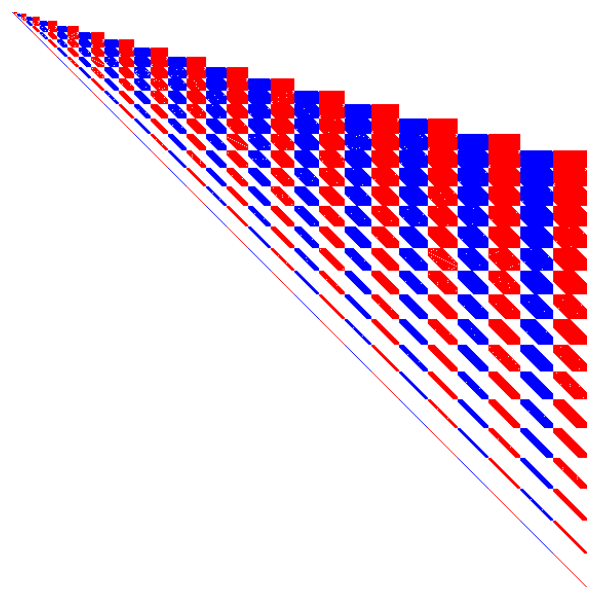

In [97]:
(* Compute with large degree, substitute numerical values and plot square matrix *)
(* Note, color changes between orders *)
(* Multiplication should be recomputed after change in globals *)

dimension = 2  ;
degree    = 32 ;

sm$set$global[dimension, degree, epsilon, accuracy] ;

sm$make$mult[] ;

matrix = sm$make$matrix["JET", mapping, "Verbose" -> True] ;

sm$matrix$plot[N@Normal@matrix /. w -> 2*Pi*0.12345, Frame -> False, ImageSize -> 600, AspectRatio -> 1]

# Example-02: 2D mapping

In [1]:
(* In this example, the application of the square matrix method to a 2D symplectic mapping is illustrated *)

(*The quadratic mapping (q, p) -> (p, -q + a*p  + p^2) with a = 0.15 is used in the computations *)
(* First, phase space trajectories and frequencies along two symmetry lines are computed numerically *)
(* Pure symbolic low-order computation is performed using the square matrix method, and the leading-order tune shift is compared with results from normal form computation *)
(* The conservation of symbolic invariant is directly tested *)
(* High-order numerical computations are performed to obtain the square matrix, normal form coordinates, invariants, and frequencies *)
(* Frequencies are compared with numerical results along symmetry lines *)
(* The conservation of invariants is tested *)
(* Frequency fluctuation is computed and compared with survival dynamic aperture *)

In [10]:
(* Load package functions *)

<< SquareMatrixMethod`

In [12]:
(* Numerical mapping factory *)

ClearAll[mapping$factory] ;
mapping$factory[parameter_] := With[
    {local$parameter=parameter},
    Compile[
        {{state, _Real, 1}},
        Block[
            {q, p},
            {q, p} = state ;
            {p, -q + local$parameter*p + p^2}
        ],
        RuntimeAttributes -> {Listable},
        Parallelization -> True,
        CompilationTarget -> "C",
        CompilationOptions -> {
            "ExpressionOptimization" -> True
        },
        RuntimeOptions -> "Speed"        
    ]
] ;

In [15]:
(* Frequency computation factory (accelerated Birkhoff average) *)

ClearAll[filter] ;
filter[order_, size_][1]     := 0.0 ;
filter[order_, size_][size_] := 0.0 ;
filter[order_, size_][i_]    := N[$MachineEpsilon + Exp[-(1/((1 - (-1 + i)/(-1 + size))^order*((-1 + i)/(-1 + size))^order))]] ;

ClearAll[frequency$factory] ;
frequency$factory[mapping_] := With[
    {local$mapping=mapping},
    Compile[
        {{window, _Real, 1}, {state, _Real, 1}},
        Block[
            {qs, ps},
            {qs, ps} = Transpose[NestList[mapping, state, Length[window]]] ;
            (window . Mod[Differences[ArcTan[ps, qs]], 2*Pi])/(2*Pi)
        ],
        RuntimeAttributes -> {Listable},
        Parallelization -> True,
        CompilationTarget -> "C",
        CompilationOptions -> {
            "ExpressionOptimization" -> True,
            "InlineExternalDefinitions" -> True
        },
        RuntimeOptions -> "Speed"           
    ]
] ;

In [22]:
(* Generate mapping and frequency functions *)

parameter = 0.15 ;
numerical = mapping$factory[parameter] ;
frequency = frequency$factory[numerical] ;

In [26]:
(* Set orbit length and compute filter data *)

length = 8192 ;
window = Quiet[Map[filter[1.0, length], Range[length]]] ;
window = window/Total[window] ;

In [30]:
(* Compute tune at small amplitude and compare with linear tune *)

tune = ArcCos[parameter/2]/(2*Pi) ;

tune - frequency[window, {10.0^-15, 0.0}] // Chop // StandardForm

RowBox[{"0"}]

-Graphics-
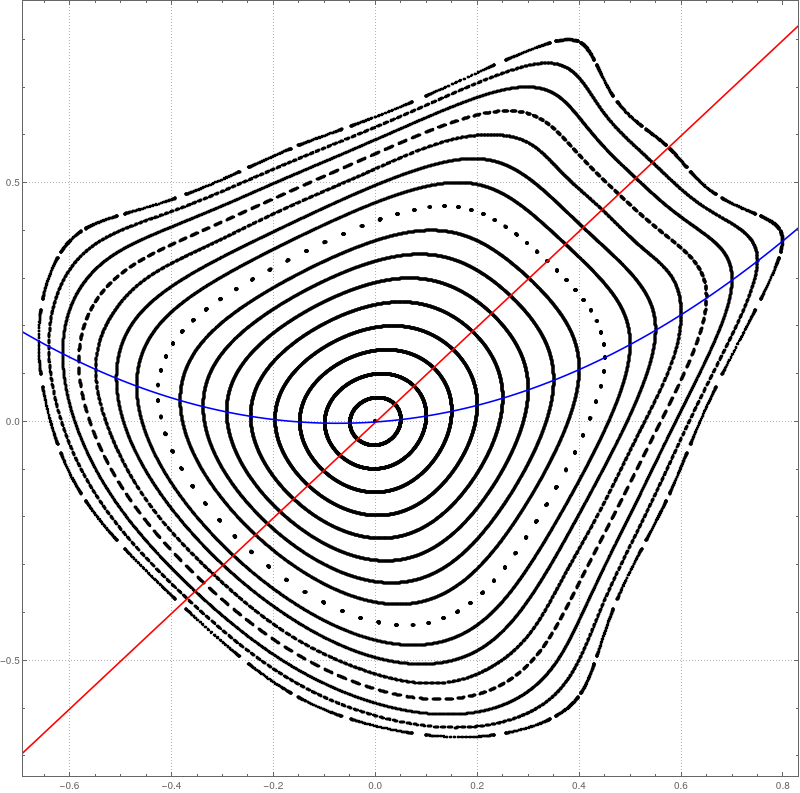

In [33]:
(* Phase space trajectories and symmetry lines *)

initials = Table[{q, 0.5*(parameter*q + q^2)}, {q, 0.0, 0.825, 0.05}] ;
orbits = Transpose[NestList[numerical, initials, length]] ;

line$a = Table[{q, q}, {q, -1.0, 1.0, 0.01}] ;
line$b = Table[{q, 0.5*(parameter*q + q^2)}, {q, -1.0, 1.0, 0.01}] ;

plot$trajectories = Show[
    ListPlot[orbits, AspectRatio -> 1, PlotTheme -> "Detailed", PlotStyle -> Black, ImageSize -> 800],
    ListLinePlot[line$a, AspectRatio -> 1, PlotTheme -> "Detailed", PlotStyle -> Red],
    ListLinePlot[line$b, AspectRatio -> 1, PlotTheme -> "Detailed", PlotStyle -> Blue]
]

-Graphics-
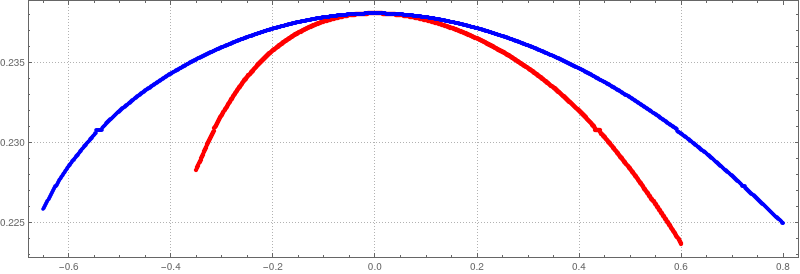

In [39]:
(* Compute frequencies along symmetry lines *)

line$a = Table[{q + $MachineEpsilon, q}, {q, -0.35, 0.60, 0.001}] ;
line$b = Table[{q + $MachineEpsilon, 0.5*(parameter*q + q^2)}, {q, -0.65, 0.80, 0.001}] ;

frequency$a = frequency[window, line$a] ;
frequency$b = frequency[window, line$b] ;

plot$frequencies = Show[
    ListPlot[Transpose[{First[Transpose[line$a]], frequency$a}], AspectRatio -> 1/3, PlotTheme -> "Detailed", PlotStyle -> Red, ImageSize -> 800],
    ListPlot[Transpose[{First[Transpose[line$b]], frequency$b}], PlotStyle -> Blue],
    PlotRange -> All
]

In [45]:
(* Define symbolic transformation *)

ClearAll[symbolic$map] ;
symbolic$map[{q_, p_}] := {p, -q + a*p + p^2} ;

In [48]:
(* Define transformation between original coordinates and Floquet frame coordinates*)

rule = {
    q -> ((q + p)*Cos[w] + (q - p)*Sin[w])/(Sqrt[2]*Sqrt[Sin[w]]), 
    p -> (q + p)/(Sqrt[2]*Sqrt[Sin[w]])
} ;

In [50]:
(* Define transformation in Floquet coordinates *)

ClearAll[floquet$map] ;
floquet$map[{q_, p_}] := Evaluate[Map[Total, Map[Simplify, MonomialList[Inverse[D[{q, p} /. rule, {{q, p}}]] . (symbolic$map[{q, p}] /. rule) /. a -> 2 Cos[w] , {q, p}]]]] ;

2
                      p  (-Cos[w] + Sin[w])   p q (-Cos[w] + Sin[w])
q Cos[w] + p Sin[w] + --------------------- + ---------------------- + 
                                       3/2                    3/2
                       2 Sqrt[2] Sin[w]         Sqrt[2] Sin[w]
 
     2
    q  (-Cos[w] + Sin[w])
>   ---------------------
                     3/2
     2 Sqrt[2] Sin[w]

                       2                                              2
                      p  (Cos[w] + Sin[w])   p q (Cos[w] + Sin[w])   q  (Cos[w] + Sin[w])
p Cos[w] - q Sin[w] + -------------------- + --------------------- + --------------------
                                      3/2                    3/2                     3/2
                      2 Sqrt[2] Sin[w]         Sqrt[2] Sin[w]        2 Sqrt[2] Sin[w]
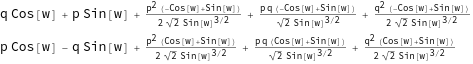

In [53]:
(* Linear part is a rotation *)

floquet$map[{q, p}] // TableForm

In [55]:
(* Set global parameters *)

dimension = 2 ;
degree = 5 ;

sm$set$global[dimension, degree] ;

-Cos[w] + Sin[w]     -Cos[w] + Sin[w]     -Cos[w] + Sin[w]
                   -------------------   -----------------   -------------------
                                   3/2                 3/2                   3/2
Cos[w]    Sin[w]   2 Sqrt[2] Sin[w]      Sqrt[2] Sin[w]      2 Sqrt[2] Sin[w]      0
 



>    0   0   0   0   0   0   0   0   0   0   0   0   0   0

                     Cos[w] + Sin[w]      Cos[w] + Sin[w]      Cos[w] + Sin[w]
                   -------------------   -----------------   -------------------
                                   3/2                 3/2                   3/2
-Sin[w]   Cos[w]   2 Sqrt[2] Sin[w]      Sqrt[2] Sin[w]      2 Sqrt[2] Sin[w]      0
 



>    0   0   0   0   0   0   0   0   0   0   0   0   0   0
            2                            2
q Cos[w] + p  cq[0, 2] + p q cq[1, 1] + q  cq[2, 0] + p Sin[w]

            2                            2
p Cos[w] + p  cp[0, 2] + p q cp[1, 1] + q  cp[2, 0] - q Sin[w]
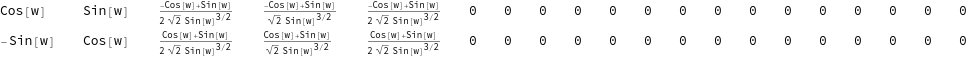
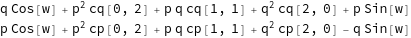

In [59]:
(* For symbolic computations, linear part should be a rotation *)
(* If nonlinear part contains complicated symbolic expressions, it might be better to replace them with other symbols *)

(* Compute jet representation of tranformation components *)

{jq, jp} = sm$make$jet[Function @@ {{q, p}, floquet$map[{q, p}]}] ;
{jq, jp} // TableForm

(* Set rules *)

rq = Thread[Apply[cq] /@ Flatten[sm$exponents, 1] -> jq] ;
rp = Thread[Apply[cp] /@ Flatten[sm$exponents, 1] -> jp] ;

(* Redefine transformation in Floquet coordinates using symbolic coefficients *)
(* Note, this mapping is not symplectic, but it is not required *)

ClearAll[floquet$map] ;
floquet$map[{q_, p_}] := {
    q*Cos[w] + p*Sin[w] + cq[0, 2]*p^2 + cq[1, 1]*p*q+ cq[2, 0]*q^2,
    p*Cos[w] - q*Sin[w] + cp[0, 2]*p^2 + cp[1, 1]*p*q+ cp[2, 0]*q^2
} ;

floquet$map[{q, p}] // TableForm

I w        2  I            cp[1, 1]   I            cq[0, 2]   I            cq[2, 0]
E    za + zb  (- cp[0, 2] - -------- - - cp[2, 0] - -------- - - cq[1, 1] + --------) + 
               4               4       4               4       4               4
 
      2  I            cp[1, 1]   I            cq[0, 2]   I            cq[2, 0]
>   za  (- cp[0, 2] + -------- - - cp[2, 0] - -------- + - cq[1, 1] + --------) + 
         4               4       4               4       4               4
 
              1                I            cq[0, 2]   cq[2, 0]
>   za zb ((-(-) I) cp[0, 2] - - cp[2, 0] + -------- + --------)
              2                2               2          2

 zb      2     1                cp[1, 1]   I            cq[0, 2]   I
---- + zb  ((-(-) I) cp[0, 2] + -------- + - cp[2, 0] - -------- - - cq[1, 1] + 
 I w           4                   4       4               4       4
E
 
       cq[2, 0]      2     1                cp[1, 1]   I            cq[0, 2]
>      --------) + za  ((-(-) I) cp[0, 2] - -------- + - cp[2, 0] - -------- + 
          4                4                   4       4               4
 
       I            cq[2, 0]           I            I            cq[0, 2]   cq[2, 0]
>      - cq[1, 1] + --------) + za zb (- cp[0, 2] + - cp[2, 0] + -------- + --------)
       4               4               2            2               2          2
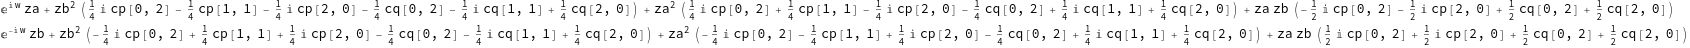

In [72]:
(* Generate transformation in complex eigencoodrinates *)

(* Set normalization matrix to identity since linear part is already a rotation *)

normalization = {{1, 0}, {0, 1}} ;

(* Convert *)

{{forward, inverse}, mapping} = sm$make$map[normalization, floquet$map] ;

Map[Total, MonomialList[mapping[za, zb], {za, zb}]] // TableForm

In [78]:
(* Generate jet multiplication *)

sm$make$mult[] ;

In [80]:
(* Compute square matrix *)

matrix = sm$make$matrix["JET", mapping, "Verbose" -> True] ;

SQUARE MATRIX ("JET")
Dimension                          :  2
Computation degree                 :  5
Monomial variables                 :  20
Matrix dimensions                  :  20 x 20 = 400
Make jets...
Finished in 0.000563 sec.
Set initial matrix...
Set partitions...
Enter main loop...
Now computing order 2...
Finished in 0.001036 sec.
Now computing order 3...
Finished in 0.007003 sec.
Now computing order 4...
Finished in 0.001216 sec.
Now computing order 5...
Finished in 0.000235 sec.
Exit main loop...
Finished in 0.029472 sec.
Return square matrix...


In [82]:
(* Square matrix in uppertriangular *)

UpperTriangularMatrixQ[matrix] // StandardForm

RowBox[{"True"}]

In [84]:
(* Eigenvalues are on the matrix diagonal *)
(* Following 10.1103/PhysRevAccelBeams.20.034001, one need to select an eigenvalue and compute corresponding left eigenvector(s) *)
(* Complex normal form coordinates, invariants (amplitudes of normal form coordinates) and frequencies are computed from left eigenvectors *)

(* For frequency computation, one needs to select exp(i*w) eigenvalue *)
(* This should be done separatly for each plane, e.g. first, perform computations for exp(i*wx), next, for exp(i*wy) *)
(* If only invariant is required, select 1 eigenvalue, use sm$make$vectors$one which returns only one eigenvector and generate invariant from it *)

Normal[Diagonal[matrix]] // StandardForm

RowBox[{"{", RowBox[{SuperscriptBox["", RowBox[{"", " ", "w"}]], ",", 

 
>         SuperscriptBox["", RowBox[{RowBox[{"-", ""}], " ", "w"}]], ",", 

 
>         SuperscriptBox["", RowBox[{"2", " ", "", " ", "w"}]], ",", "1", ",", 

 
>         SuperscriptBox["", RowBox[{RowBox[{"-", "2"}], " ", "", " ", "w"}]], ",", 

 
>         SuperscriptBox["", RowBox[{"3", " ", "", " ", "w"}]], ",", 

 
>         SuperscriptBox["", RowBox[{"", " ", "w"}]], ",", 

 
>         SuperscriptBox["", RowBox[{RowBox[{"-", ""}], " ", "w"}]], ",", 

 
>         SuperscriptBox["", RowBox[{RowBox[{"-", "3"}], " ", "", " ", "w"}]], ",", 

 
>         SuperscriptBox["", RowBox[{"4", " ", "", " ", "w"}]], ",", 

 
>         SuperscriptBox["", RowBox[{"2", " ", "", " ", "w"}]], ",", "1", ",", 

 
>         SuperscriptBox["", RowBox[{RowBox[{"-", "2"}], " ", "", " ", "w"}]], ",", 

 
>         SuperscriptBox["", RowBox[{RowBox[{"-", "4"}], " ", "", " ", "w"}]], ",", 

 
>         SuperscriptBox["", RowBox[{"5", " ", "", " ", "w"}]], ",", 

 
>         SuperscriptBox["", RowBox[{"3", " ", "", " ", "w"}]], ",", 

 
>         SuperscriptBox["", RowBox[{"", " ", "w"}]], ",", 

 
>         SuperscriptBox["", RowBox[{RowBox[{"-", ""}], " ", "w"}]], ",", 

 
>         SuperscriptBox["", RowBox[{RowBox[{"-", "3"}], " ", "", " ", "w"}]], ",", 

 
>         SuperscriptBox["", RowBox[{RowBox[{"-", "5"}], " ", "", " ", "w"}]]}],\
 
>    "}"}]

In [91]:
(* Compute eigenvectors for selected eigenvalue *)

value = Exp[I*w] ;

vectors = sm$make$vectors[value, matrix, "Verbose" -> True] ;

                                           -12
Chop delta parameter               :  1. 10
Phase space dimension              :  2
Computation degree                 :  5
Square matrix dimensions           :  20 x 20 = 400
Number of nonzero matrix elements  :  105 (26.25 %)
                                       I w
Selected eigenvalue                :  E
Eigenvalue multiplicity            :  3
First vector leading degree        :  1
Invariant dimension                :  3
Define vectors...
Set zero and arbitrary components...
Number of zero vector components   :  {30, 60}
Distribution of zero components    :  {{1, 3}, {2, 8}, {3, 19}}
Define Jordan block for effective invariant subspace dimension...
Define normal form matrix...
Normal form matrix dimensions      :  {3, 3}
Compute dot product of normal form matrix and left eigenvectors...
Finished in 0.000139 sec.
Define vectors and matrix partitions...
Define variables grouped by degree...
Find vector components degree-by-degree...
Cu

In [94]:
(* Number of eigenvectors is equal to the selected eigenvalue multiplicity *)

sm$count$dimension[value, matrix] // StandardForm

Length[vectors] // StandardForm

RowBox[{"3"}]
RowBox[{"3"}]

In [97]:
(* Compute normal form coordinates *)

(* Note, normal form coordinates are expressed using Floquet frame coordinates *)

{va, vb, vc} = vectors ;

(* Compute eigenmonomials as a function of Floquet frame coordinates *)

monomials = sm$transform$monomials[sm$monomials, inverse] ;

(* Compute normal form complex coordinates *)

wa = sm$make$coordinate[monomials, {q, p}, va, True] ;
wb = sm$make$coordinate[monomials, {q, p}, vb, True] ;
wc = sm$make$coordinate[monomials, {q, p}, vc, True] ;

In [106]:
(* Compute invariants *)
(* Invariants are given by polynomials *)

ia = sm$make$invariant[degree, {q, p}, wa, Simplify] ;
ib = sm$make$invariant[degree, {q, p}, wb, Simplify] ; 
ic = sm$make$invariant[degree, {q, p}, wc, Simplify] ; 

In [111]:
(* Leading invariant term is a circle (action) *)
(* For other invariant leading order is of higher degree *)

Collect[ia[t*q, t*p], t] /. t^n_ /; n > 2 :> 0

2    2   2
(p  + q ) t

In [114]:
(* Check invariant conservation *)

Series[ia @@ {t*q, t*p} - ia @@ floquet$map @ {t*q, t*p}, {t, 0, degree}] /. rq /. rp // Simplify

6
O[t]

In [116]:
(* Compute frequency *)
(* Frequency is a rational function *)

frequency = sm$make$frequency[degree, {q, p}, wb, wa] ; 

RowBox[{"-", FractionBox[RowBox[{RowBox[{"(", 

 
>            RowBox[{"1", "+", RowBox[{"2", " ", "a"}]}], ")"}], " ", 

 
>          RowBox[{"(", RowBox[{SuperscriptBox["p", "2"], "+", SuperscriptBox["q",\
 
>    "2"]}], 
         ")"}]}], RowBox[{"2", " ", 

 
>          SuperscriptBox[RowBox[{"(", RowBox[{RowBox[{"-", "2"}], "+", "a"}], ")"}],\
 
>    "2"], 
       " ", RowBox[{"(", RowBox[{"1", "+", "a"}], ")"}], " ", 

 
>          RowBox[{"(", RowBox[{"2", "+", "a"}], ")"}], " ", "π"}]]}]

RowBox[{"-", FractionBox[RowBox[{RowBox[{"(", 

 
>            RowBox[{"1", "+", RowBox[{"2", " ", "a"}]}], ")"}], " ", 

 
>          RowBox[{"(", RowBox[{SuperscriptBox["p", "2"], "+", SuperscriptBox["q",\
 
>    "2"]}], 
         ")"}]}], RowBox[{"2", " ", 

 
>          SuperscriptBox[RowBox[{"(", RowBox[{RowBox[{"-", "2"}], "+", "a"}], ")"}],\
 
>    "2"], 
       " ", RowBox[{"(", RowBox[{"1", "+", "a"}], ")"}], " ", 

 
>          RowBox[{"(", RowBox[{"2", "+", "a"}], ")"}], " ", "π"}]]}]
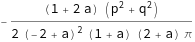
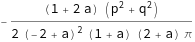

In [119]:
(* Compare leading order frequency expansion with normal form result *)

- 1/2*(q^2 + p^2)*(1 + 2*a)/((-2 + a)^2*(1 + a)*(2 + a)*Pi) // StandardForm
FullSimplify[ExpToTrig[Normal[Series[frequency[t q, t p] /. rq /. rp, {t, 0, 1 + 1}]]]] /. t -> 1  /. w -> ArcCos[a/2] // FullSimplify // StandardForm

In [122]:
(* Perform high order numerical computation *)

(* Set numerical mapping *)

ClearAll[initial] ;
initial[{q_, p_}] := Evaluate[symbolic$map[{q, p}] /. a -> 2 Cos[w] /. w -> 2*Pi*tune] ;

(* Set global parameters *)

dimension = 2 ;
degree = 12 ;

sm$set$global[dimension, degree, 10.0^-10] ;

(* Convert mapping *)
(* Note, here normalization from original to Floquet coordinates is passed *)
(* Invariants and frequencies will be in original coordinates *)

normalization = D[{q, p} /. rule, {{q, p}}] /. w -> 2*Pi*tune ;
{{forward, inverse}, mapping} = sm$make$map[normalization, initial] ;

(* Multiplication *)

sm$make$mult[] ;
sm$optimize$mult[mapping] ;

(* Square matrix *)

matrix = sm$make$matrix["COMPILED", mapping] ;

(* Eignevalue *)

value = Exp[I*2*Pi*tune] ;

(* Eigenvectors *)

vectors = sm$make$vectors[value, matrix] ;

(* Normal form coordinates *)

{va, vb, vc, vd, ve, vf} = vectors ;

monomials = sm$transform$monomials[sm$monomials, inverse] ;

wa = sm$make$coordinate[monomials, {q, p}, va, True] ;
wb = sm$make$coordinate[monomials, {q, p}, vb, True] ;
wc = sm$make$coordinate[monomials, {q, p}, vc, True] ;

(* Invariants *)

ia = sm$make$invariant[degree, {q, p}, wa] ;
ib = sm$make$invariant[degree, {q, p}, wb] ; 
ic = sm$make$invariant[degree, {q, p}, wc] ; 

(* Frequency *)

frequency = sm$make$frequency[degree, {q, p}, wb, wa] ; 

In [156]:
(* Check invariants conservation *)

Series[ia @@ {t*q, t*p} - ia @@ initial @ {t*q, t*p}, {t, 0, degree}] // Simplify // sm$chop
Series[ib @@ {t*q, t*p} - ib @@ initial @ {t*q, t*p}, {t, 0, degree}] // Simplify // sm$chop
Series[ic @@ {t*q, t*p} - ic @@ initial @ {t*q, t*p}, {t, 0, degree}] // Simplify // sm$chop

13
O[t]
    13
O[t]
    13
O[t]

{Labeled[-Graphics-, ORDER: 2, {{Top, Left}}], 
 
>   Labeled[-Graphics-, ORDER: 4, {{Top, Left}}], 
 
>   Labeled[-Graphics-, ORDER: 6, {{Top, Left}}], 
 
>   Labeled[-Graphics-, ORDER: 8, {{Top, Left}}], 
 
>   Labeled[-Graphics-, ORDER: 10, {{Top, Left}}], 
 
>   Labeled[-Graphics-, ORDER: 12, {{Top, Left}}]}
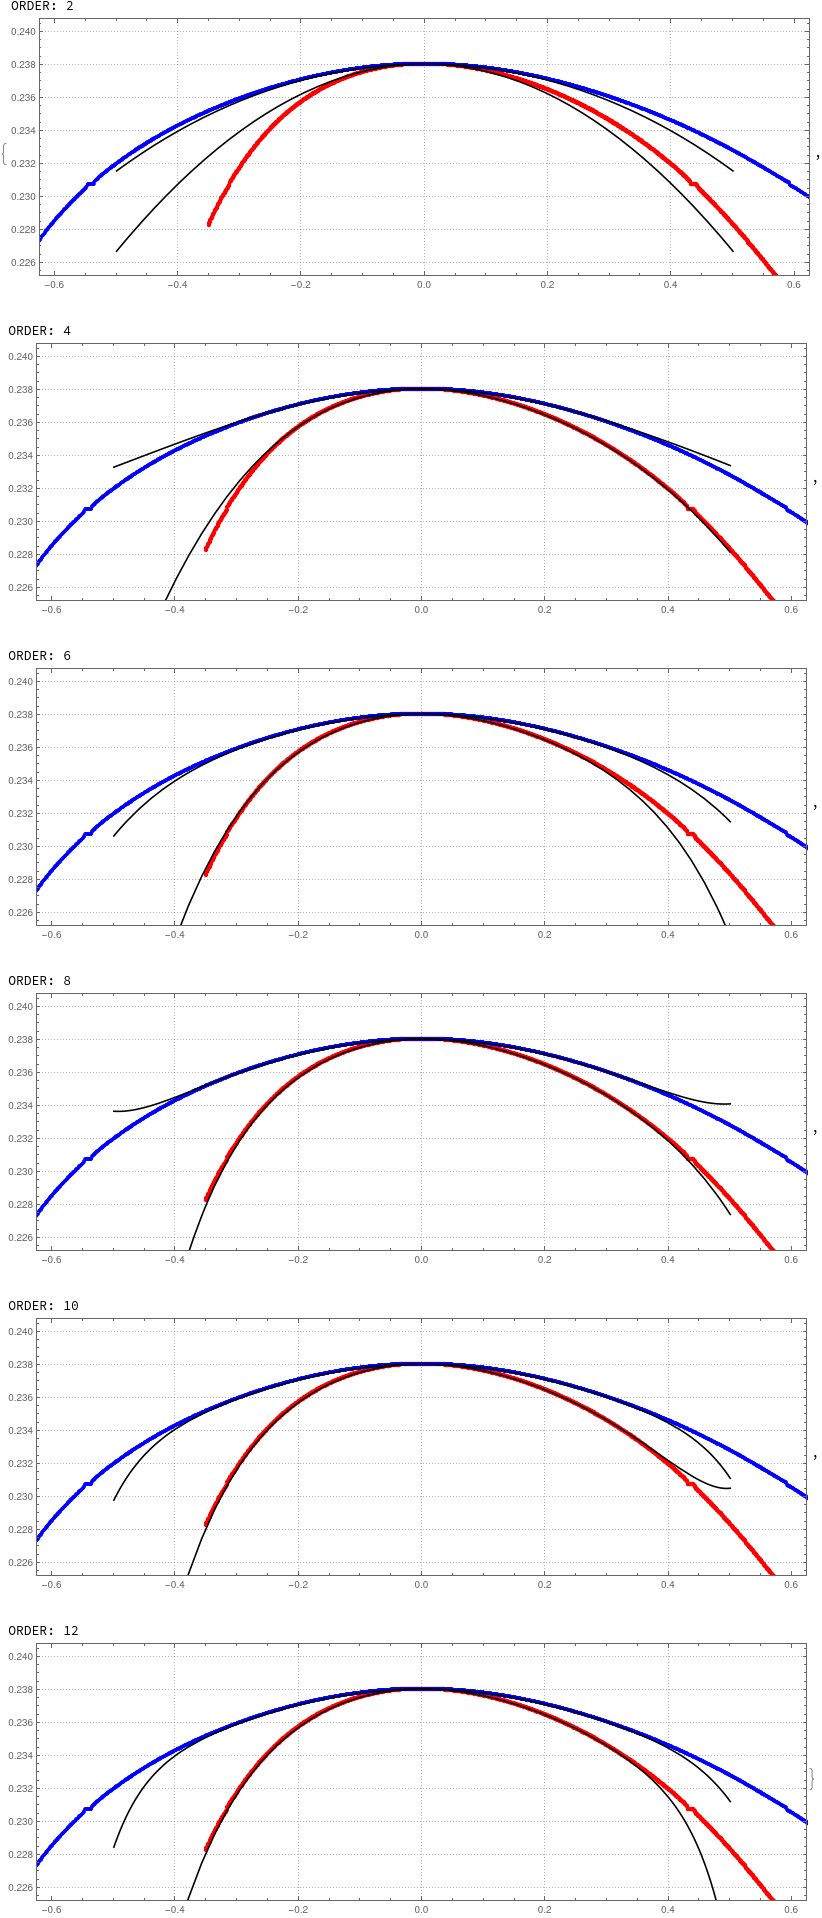

In [160]:
(* Examine frequency convergence *)
(* Convergence is not guarantied (mostly fails), especially if there are mode locked regions *) 

Table[
    expression$a = sm$chop[ComplexExpand[Normal[Series[frequency[t*q, t*p], {t, 0, order}]] /. t -> 1]] ;
    expression$a = tune + expression$a /. w -> 2.0*Pi*tune /. p ->  q // Simplify // PowerExpand // sm$chop ;
    expression$b = sm$chop[ComplexExpand[Normal[Series[frequency[t*q, t*p], {t, 0, order}]] /. t -> 1]] ;
    expression$b = tune + expression$b /. w -> 2.0*Pi*tune /. p ->  0.5*(parameter*q + q^2) // Simplify // PowerExpand // sm$chop ;
    Labeled[
        Show[
            ListPlot[Transpose[{First[Transpose[line$a]], frequency$a}], PlotTheme -> "Detailed", PlotStyle -> Red, AspectRatio -> 1/3],
            ListPlot[Transpose[{First[Transpose[line$b]], frequency$b}], PlotTheme -> "Detailed", PlotStyle -> Blue],
            Plot[Re[Evaluate[expression$a]], {q, -0.5, 0.5}, PlotStyle->Black],
            Plot[Re[Evaluate[expression$b]], {q, -0.5, 0.5}, PlotStyle->Black],
            PlotRange -> {{-0.6, 0.6}, {0.226, 0.240}},
            ImageSize -> 800
        ],
        StringTemplate["ORDER: ``"][order],
        {{Top, Left}}
    ],
    {order, {2, 4, 6, 8, 10, 12}}
]

-Graphics-
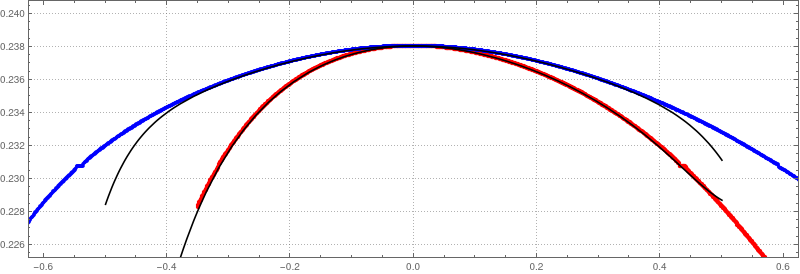

In [163]:
(* Use full rational frequency expression *)

expression$a = frequency[q, p] ;
expression$a = tune + expression$a /. w -> 2.0*Pi*tune /. p ->  q // Simplify // PowerExpand // sm$chop ;

expression$b = frequency[q, p] ;
expression$b = tune + expression$b /. w -> 2.0*Pi*tune /. p ->  0.5*(parameter*q + q^2) // Simplify // PowerExpand // sm$chop ;

Show[
    ListPlot[Transpose[{First[Transpose[line$a]], frequency$a}], PlotTheme -> "Detailed", PlotStyle -> Red, AspectRatio -> 1/3],
    ListPlot[Transpose[{First[Transpose[line$b]], frequency$b}], PlotTheme -> "Detailed", PlotStyle -> Blue],
    Plot[Re[Evaluate[expression$a]], {q, -0.5, 0.5}, PlotStyle->Black],
    Plot[Re[Evaluate[expression$b]], {q, -0.5, 0.5}, PlotStyle->Black],
    PlotRange -> {{-0.6, 0.6}, {0.226, 0.240}},
    ImageSize -> 800
]

{2, 0.0350208}
{4, 0.0182877}
{6, 0.00940774}
{8, 0.0020996}
{10, 0.00170629}
{12, 0.00117147}


-Graphics-
-Graphics-
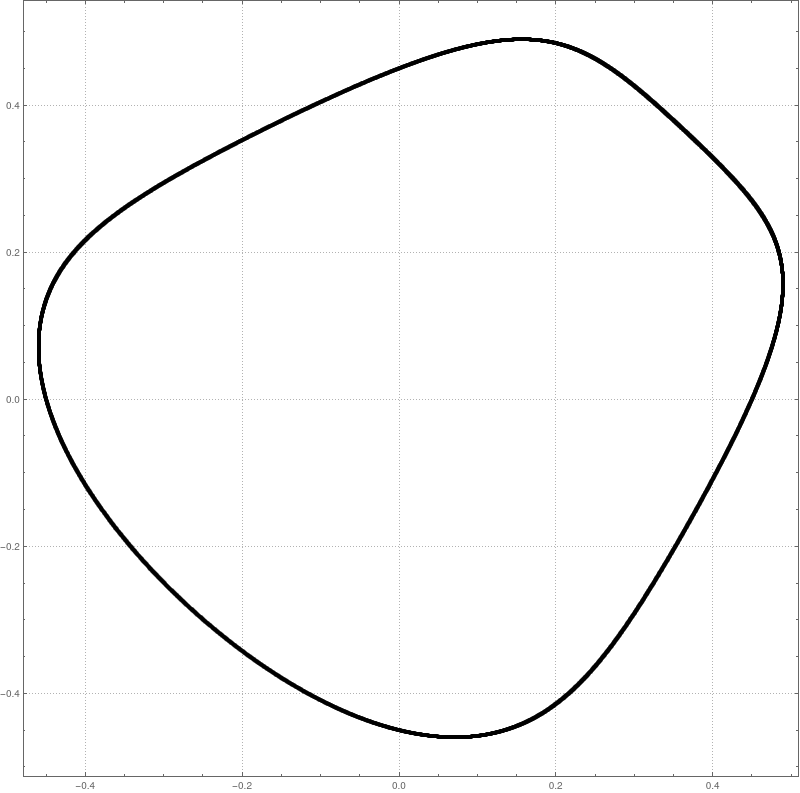
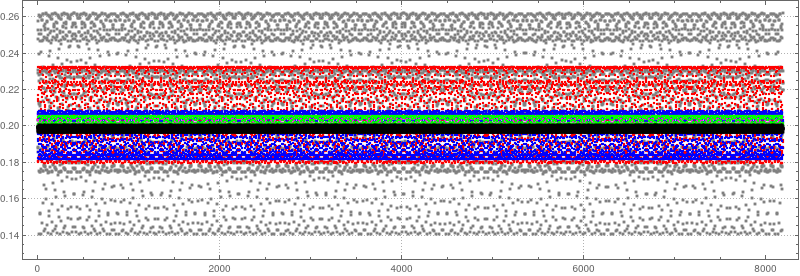

In [169]:
(* Check invariant conservation (spread) vs polynomial order *)

(* Generate orbit *)

{qs, ps} = Transpose[NestList[numerical, {0.45, 0.0}, 8192 - 1]] ;

(*  Plot orbit *)

ListPlot[Transpose[{qs, ps}],  PlotTheme -> "Detailed", PlotStyle -> Black, AspectRatio -> 1, ImageSize -> 800]

(* Compute truncated invariants *)

Show[
    Table[
        {order, color} = data ;
        invariant = sm$chop[ia[q, p]] /. Thread[{q, p} -> {t*q, t*p}] /. t^n_ /; n > order :> 0.0 /. t -> 1 /. {q -> qs, p -> ps} ;
        Print[{order, StandardDeviation[invariant]}] ;
        ListPlot[invariant, PlotTheme -> "Detailed", PlotStyle -> color, AspectRatio -> 1/3, ImageSize -> 800],
        {data, {{2, Gray}, {4, Red}, {6, Blue}, {8, Magenta}, {10, Green}, {12, Black}}}
    ]
]

{Labeled[-Graphics-, ORDER: 2, {{Top, Left}}], 
 
>   Labeled[-Graphics-, ORDER: 4, {{Top, Left}}], 
 
>   Labeled[-Graphics-, ORDER: 6, {{Top, Left}}], 
 
>   Labeled[-Graphics-, ORDER: 8, {{Top, Left}}], 
 
>   Labeled[-Graphics-, ORDER: 10, {{Top, Left}}], 
 
>   Labeled[-Graphics-, ORDER: 12, {{Top, Left}}]}
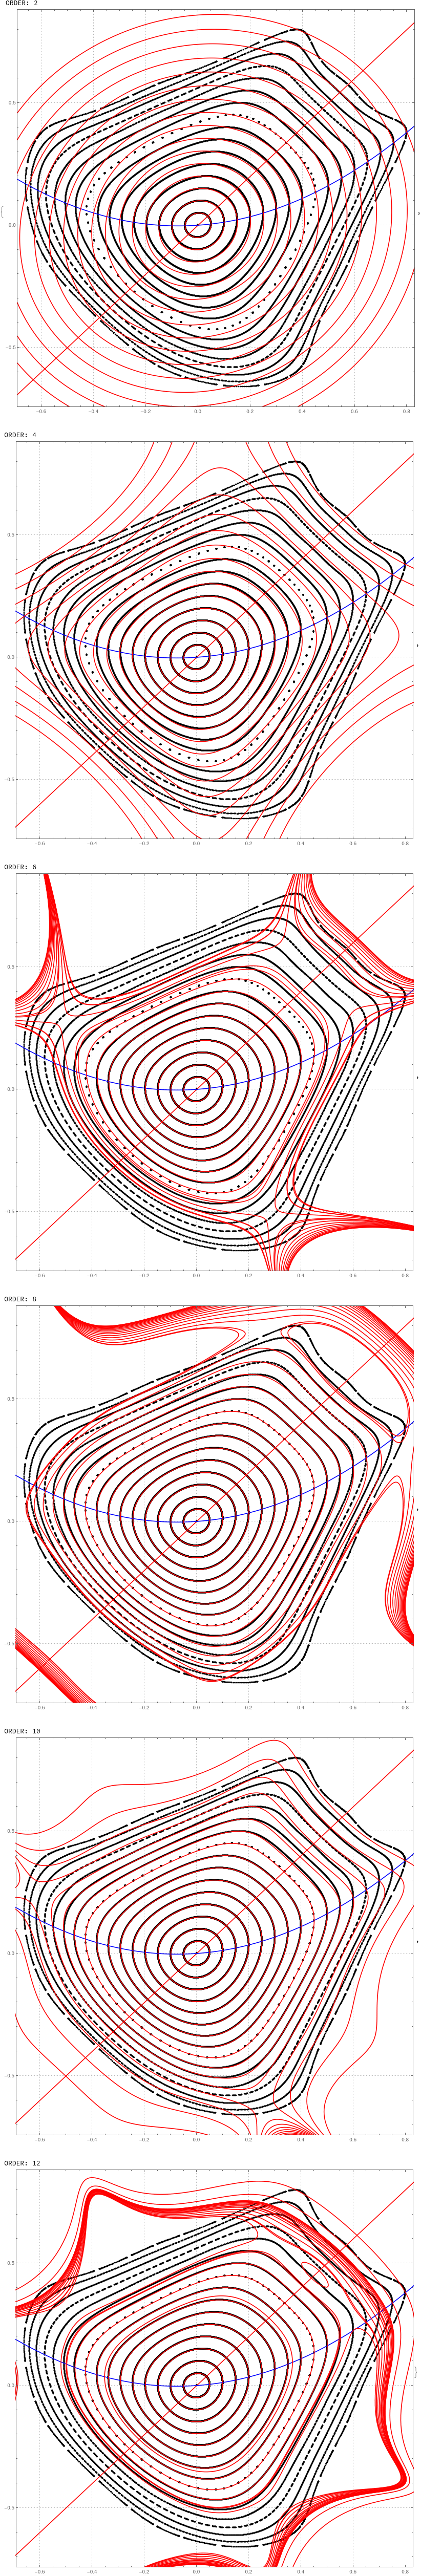

In [176]:
(* Phase space trajectories and invariant level sets *)

Table[
    invariant = sm$chop[ia[q, p]] /. Thread[{q, p} -> {t*q, t*p}] /. t^n_ /; n > order :> 0.0 /. t -> 1 ;
    initials = Table[invariant /. p ->  0.5*(parameter*q + q^2), {q, 0.0, 0.825, 0.05}] ;
    contours = Thread[invariant == initials] ;
    Labeled[
        Show[
            plot$trajectories,
            ContourPlot[Evaluate[contours] , {q, -1, 1}, {p, -1, 1}, PlotPoints->100, ContourStyle -> Red],
            ImageSize -> 800
        ],
        StringTemplate["ORDER: ``"][order],
        {{Top, Left}}
    ],
    {order, {2, 4, 6, 8, 10, 12}}
]

-7             -11               -7             -23
3    1.14422 10   + 6.40028 10    I   1.14606 10   + 4.42954 10    I

               -8             -12               -8             -23
4    5.08206 10   - 8.28925 10    I   5.08036 10   + 3.72963 10    I

               -7             -11               -7            -22
5    1.07382 10   + 1.90005 10    I   1.07437 10   + 2.1582 10    I

               -7             -11               -7             -22
6    1.22951 10   - 1.30321 10    I   1.22916 10   - 1.82386 10    I

               -7             -11               -7             -23
7    1.05859 10   - 1.10842 10    I   1.05825 10   + 4.28713 10    I

               -7             -12               -7             -22
8    1.36764 10   + 2.94959 10    I   1.36731 10   + 2.22487 10    I

               -7             -11               -7           -22
9    1.45985 10   + 1.07333 10    I   1.46002 10   + 8.416 10    I

               -7             -13               -7             -22
10   1.53939 10   - 7.82908 10    I   1.53886 10   + 1.00626 10    I

               -7             -11               -7             -22
11   2.26694 10   - 2.75663 10    I   2.26601 10   + 5.63377 10    I

               -7             -12               -7             -21
12   2.33417 10   + 9.50938 10    I   2.33323 10   + 1.03134 10    I
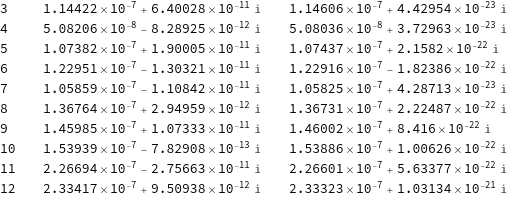

In [178]:
(* Frequency 'fluctuation' and window weighting *)

(* EQ 1.19 in 10.1103/PhysRevAccelBeams.20.034001 defines frequency 'fluctuation' that can be used as a merit of stability *)
(* Bellow we compute this expression std for a test trajectory and compare results for different order and window weighting *)

(* Generate orbit *)

{qs, ps} = Transpose[NestList[numerical, {0.45, 0.0}, 8192 - 1]] ;

(* Set window *)

window = Quiet[Map[filter[1.0, 8192], Range[8192]]] ;
window = window/Total[window] ;

(* Compute variation *)

Table[
    delta = wc/wa - (wb/wa)^2 ;
    delta = Collect[sm$chop[delta] /. Thread[{q, p} -> {t*q, t*p}], t] /. t^n_ /; n > order :> 0.0 /. t -> 1 ;
    delta = delta /. {q -> qs, p -> ps} ;
    {order, mean = Total[delta]/Length[delta] ; spread = Total[(delta - mean)^2]/Length[delta], mean = window . delta ; spread = window . (delta - mean)^2},
    {order, {3, 4, 5, 6, 7, 8, 9, 10, 11, 12}}
] // TableForm

(* For small amplitudes, the value is close to zero, while it seems to monotonicaly grow for large amplitudes *)
(* For chaotic initials, it is expected to have large variation *)
(* Bellow we explore how this indicator can be used to get more insights into dynamic aperture structure than just survival dynamic apreture *)
(* We compute and compare indicator for different truncation degrees *)

In [192]:
(* First, define functions for survival dynamic aperture computation *)

(* Define aperture wrapper *)

ClearAll[wrapper] ;
wrapper = Compile[
    {{state, _Real, 1}},
    Block[
        {f, q, p},
        {f, q, p} = state ;
        If[
            q^2 + p^2 > 10.0,
            f = 0.0 ;
        ] ;
        If[
            f > 0.5,
            {q, p} = numerical[{q, p}] ;            
        ] ;
        {f, q, p}
    ],
    RuntimeAttributes -> {Listable},
    Parallelization -> True,
    CompilationTarget -> "C",
    CompilationOptions -> {
        "ExpressionOptimization" -> True,
        "InlineExternalDefinitions" -> True
    },
    RuntimeOptions -> "Speed"        
] ;

(* Define survival dynamic apreture computaton *)

ClearAll[survival] ;
survival = Compile[
    {{n, _Integer}, {state, _Real, 1}},
    First[Nest[wrapper, state, n - 1]],
    RuntimeAttributes -> {Listable},
    Parallelization -> True,
    CompilationTarget -> "C",
    CompilationOptions -> {
        "ExpressionOptimization" -> True,
        "InlineExternalDefinitions" -> True
    },
    RuntimeOptions -> "Speed"        
] ;

In [199]:
(* Generate initial grid *)

xs = Table[{1.0, q, p}, {q, -1.0 + 10.0^-12, 1.0, 0.002}, {p, -1.0, 1.0, 0.002}] ;
xs = Flatten[xs, 1] ;

-Graphics-
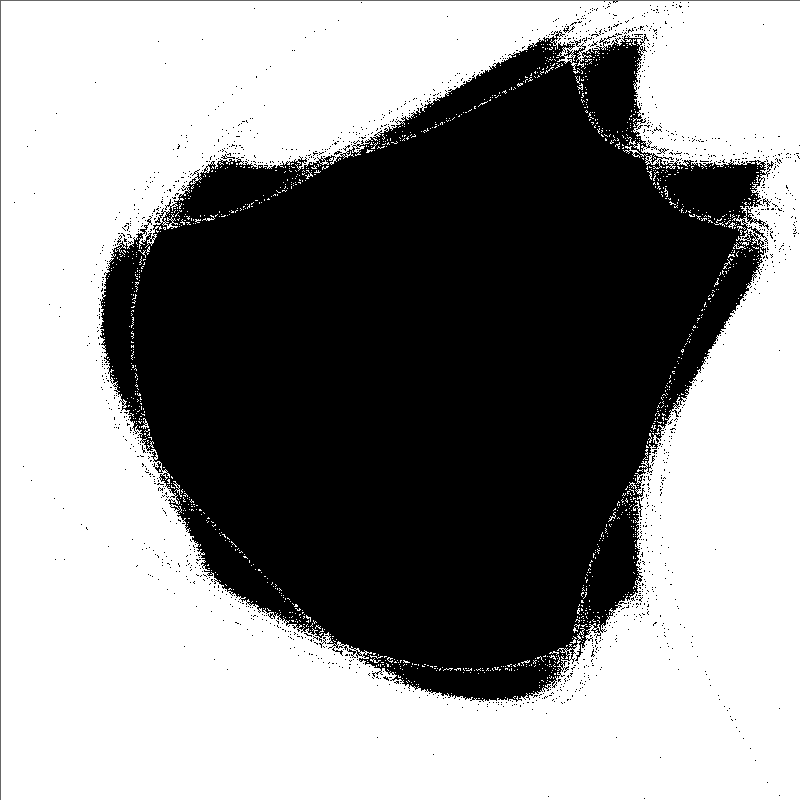

In [202]:
(* Compute and plot survival dynamic aperture *)

ArrayPlot[
    Transpose[Map[Reverse, ArrayReshape[survival[2^10, xs], {1001, 1001}]]], 
    ImageSize -> 800, 
    ColorRules -> {0.0 -> LightGray, 1.0 -> Black}, 
    ImagePadding -> 0, 
    PlotRangePadding -> 0
]

In [204]:
(* Define indicator function factory *)

ClearAll[indicator$factory] ;
indicator$factory[delta_] := With[
    {local$delta=delta},
    Compile[
        {{window, _Real, 1}, {state, _Real, 1}},
        Block[
            {flags, qs, ps, data, mean},
            {flags, qs, ps} = Transpose[NestList[wrapper, state, Length[window] - 1]] ;
            If[
                Last[flags] < 0.5, 
                0.0,
                data = MapThread[local$delta, {qs, ps}] // Abs ;
                mean = window . data ;
                Log10[(window . (data - mean)^2 // Sqrt) + 10.0^-15]
            ] 
        ],
        RuntimeAttributes -> {Listable},
        Parallelization -> True,
        CompilationTarget -> "C",
        CompilationOptions -> {
            "ExpressionOptimization" -> True,
            "InlineExternalDefinitions" -> True
        },
        RuntimeOptions -> "Speed"        
    ]
] ;

In [207]:
(* Set window *)

window = Quiet[Map[filter[1.0, 2^10], Range[2^10]]] ;
window = window/Total[window] ;

{Labeled[-Graphics-, ORDER: 3, {{Top, Left}}], 
 
>   Labeled[-Graphics-, ORDER: 6, {{Top, Left}}], 
 
>   Labeled[-Graphics-, ORDER: 9, {{Top, Left}}], 
 
>   Labeled[-Graphics-, ORDER: 12, {{Top, Left}}]}
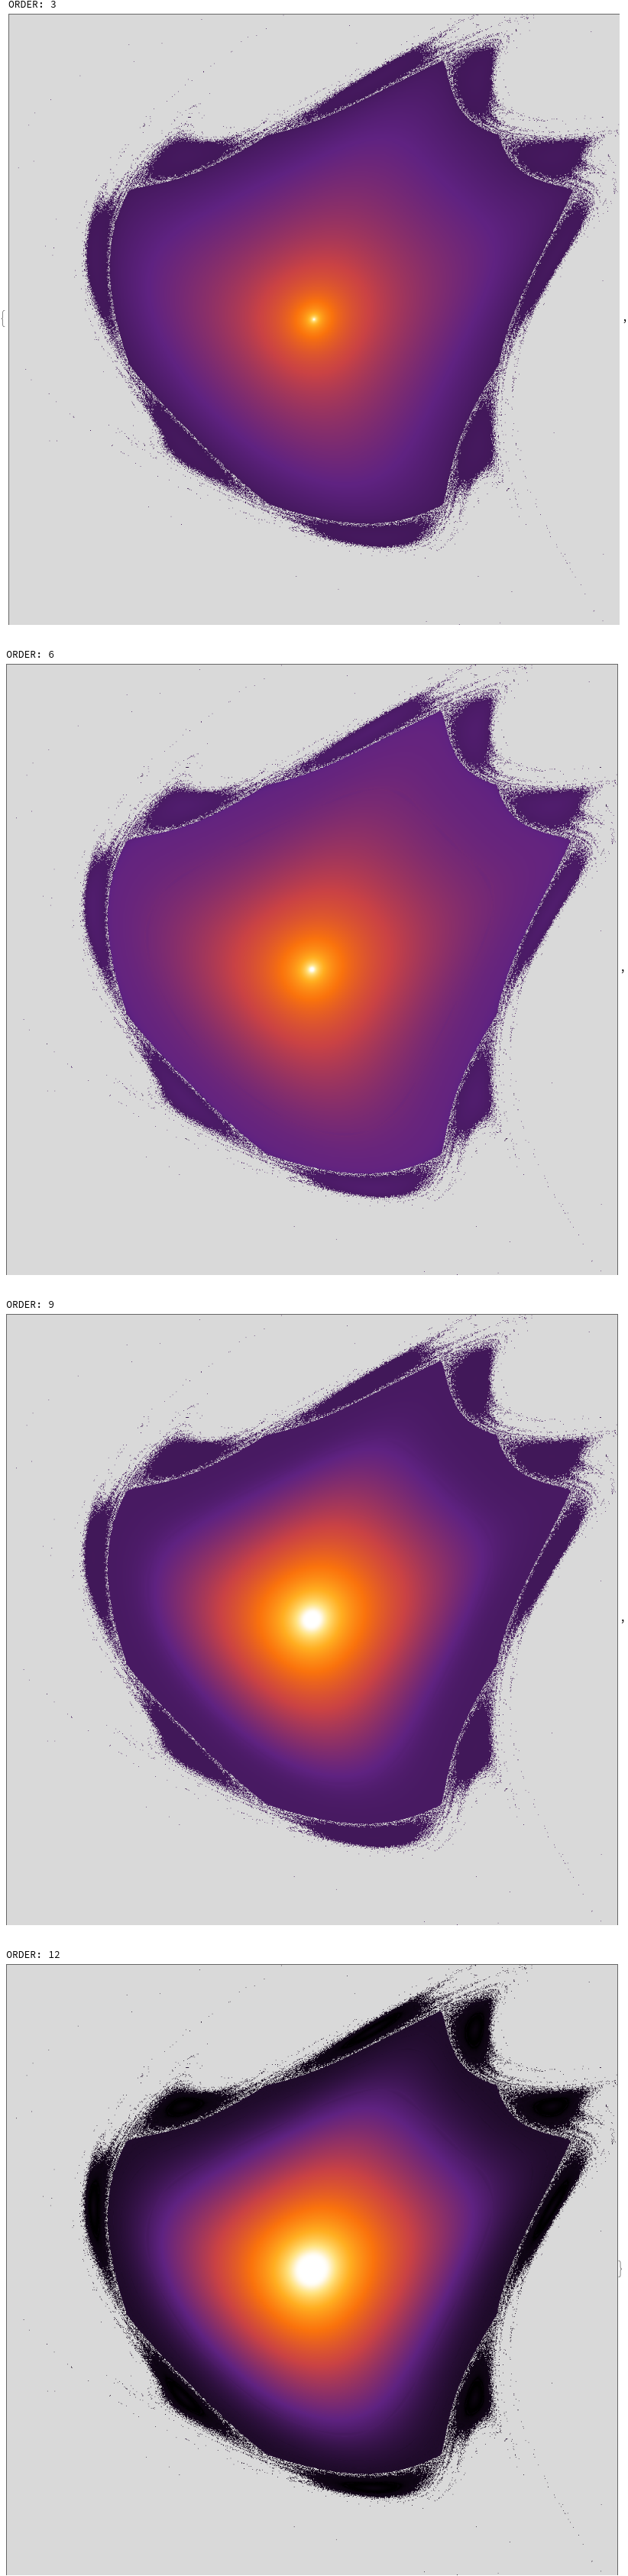

In [210]:
(* Compute indicator *)

cf = If[# == 0.0, LightGray, ColorData[{"SunsetColors", "Reversed"}] @ Rescale[#, {-15.0, -0.5}]] & ;

Table[
    {order, color} = data ;
    delta = wc/wa - (wb/wa)^2 ;
    delta = Collect[sm$chop[delta] /. Thread[{q, p} -> {t*q, t*p}], t] /. t^n_ /; n > order :> 0.0 /. t -> 1 ; 
    delta = Function @@ {{q, p}, delta} ;
    indicator = indicator$factory[delta] ;    
    out = indicator[window, xs] ;
    out = Clip[out,  {-15.0, -0.5} ] * Unitize[out] ;
    plot[order] = ListPlot[Sort[Flatten[out]], PlotTheme -> "Detailed", ImageSize -> 800, PlotRange->All, AspectRatio -> 1/3, PlotStyle -> color] ; 
    out = Transpose[Map[Reverse, ArrayReshape[out, {1001, 1001}]]] ;
    Labeled[
        ArrayPlot[
            out, 
            ImageSize -> 800, 
            ColorFunction -> cf,
            ColorFunctionScaling -> False,
            ImagePadding -> 0, 
            PlotRangePadding -> 0        
        ],
        StringTemplate["ORDER: ``"][order],
        {{Top, Left}}        
    ], 
    {data, {{3, Gray}, {6, Red}, {9, Blue}, {12, Black}}}
]

-Graphics-
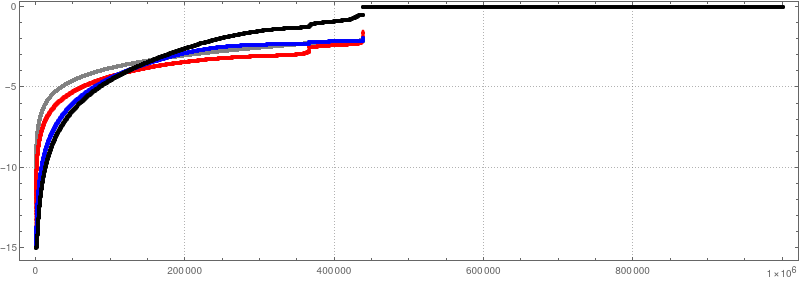

In [213]:
(* Compare sorted indicator values for different truncation orders *)

Show[Table[plot[order], {order, {3, 6, 9, 12}}]]